# Importing necessory Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Importing Datasets

In [2]:
cab_data = pd.read_csv('datasets/cab_rides.csv')
weather_data = pd.read_csv('datasets/weather.csv')

In [3]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [4]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


### Let's observe our data

In [5]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [6]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


# Data Manipulation

### Let's convert our Time_stamp column into date time formate

In [7]:
import datetime
cab_data['datetime'] = pd.to_datetime(cab_data['time_stamp'], errors = 'coerce', format='%d-%m-%Y %H:%M', )
weather_data['date_time'] = pd.to_datetime(weather_data['time_stamp'], errors = 'coerce', format='%d-%m-%Y %H:%M')

In [8]:
df  = pd.concat([cab_data, weather_data])
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


### Let's replace NaN values

In [9]:
df['day'] = df.date_time.dt.day
df['hour'] = df.date_time.dt.hour
df.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [10]:
df.fillna(0, inplace = True)
df.head(2)

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,...,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,...,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


# Data Visualization

### Uber vs Lyft

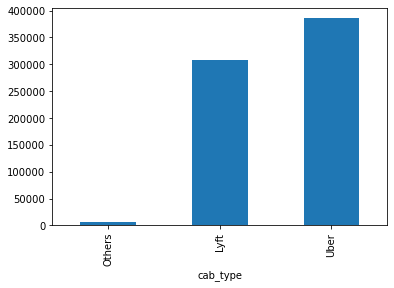

In [11]:
df.groupby(df.cab_type)['cab_type'].count().plot.bar()
plt.xticks([0, 1, 2],['Others', 'Lyft', 'Uber'])
plt.show()

### Let's compare prices of cab with the rain.

#### Rain vs Price

[]

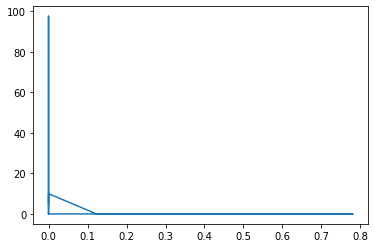

In [12]:
plt.plot(df['rain'], df['price'])
plt.plot()

### Let's create model to predict fare prices using linear regression

#### Here distance, temp ,clouds , pressure, humidity, wind, rain, day, hour, surge_multiplier and clouds are independent variable for our model 
#### And, price is dependent variable.

In [13]:
X = df[['distance', 'temp','clouds', 'pressure', 'humidity','wind','rain','day','hour','surge_multiplier','clouds']]
y = df['price']

#### We will be using train_test_split model and will split data into training and testing sets using skicit-learn

In [14]:
from sklearn.model_selection import train_test_split

#### Let's define our train and test dataset

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)

In [16]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [17]:
predictions = linear.predict(X_test)

In [18]:
df_actual_vs_predict = pd.DataFrame({'Actual': y_test, 'predicted':predictions})
df_actual_vs_predict

,Actual,predicted
81607,42.5,32.547222
354,0.0,14.755639
471801,32.5,16.816987
407645,27.5,10.480252
474760,27.5,10.556598
...,...,...
538489,7.5,10.709291
579511,13.5,15.519101
5421,9.0,11.829035
279982,8.0,11.854484


## Let's visualize our actual and predicted prices for rides 

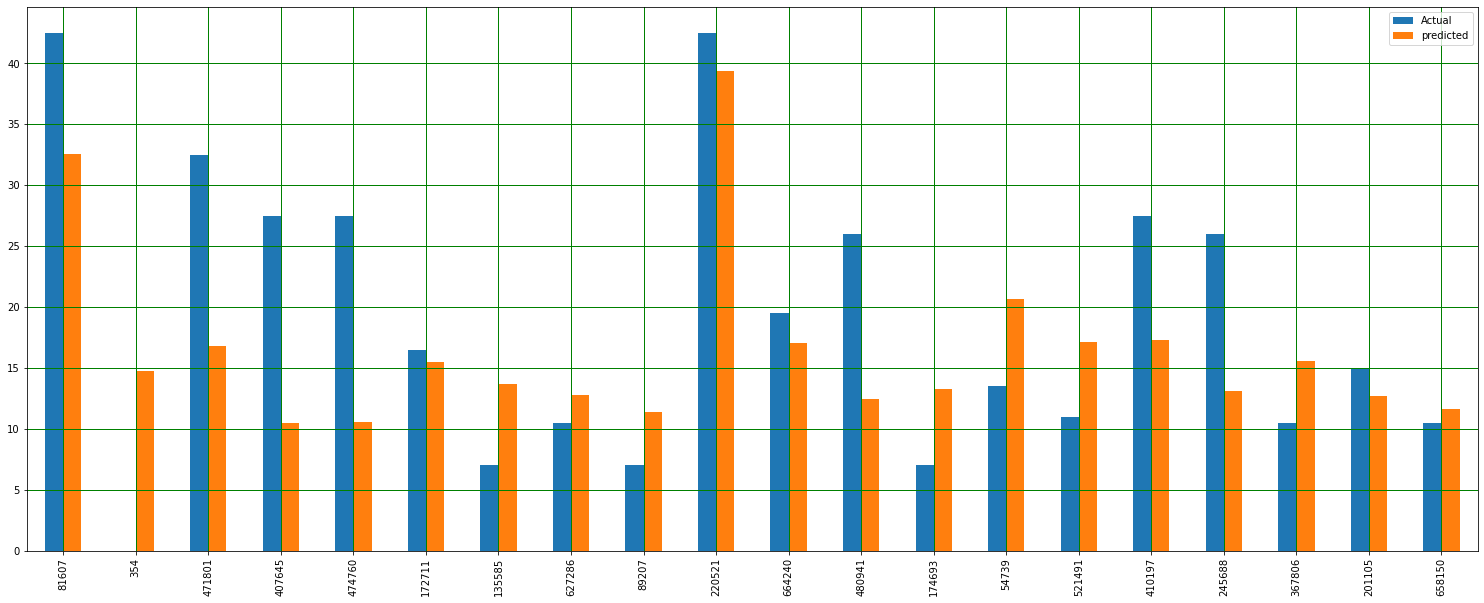

In [19]:
df1 = df_actual_vs_predict.head(20)
df1.plot(kind='bar',figsize=(26,10))
plt.grid(which='major', linestyle='-', linewidth='1.0', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1.0', color='black')
plt.show()